In [24]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# GitHub raw CSV URL for linelist death csv file
url = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/linelist_deaths.csv'

# Load the CSV file into a DataFrame
linelist_deaths = pd.read_csv(url)

# Convert the 'date_announced' column to a datetime object in linelist_deaths
linelist_deaths['date_announced'] = pd.to_datetime(linelist_deaths['date_announced'])

# Display the first 10 rows to confirm it's loaded correctly
linelist_deaths.head(10)


,date,date_announced,date_positive,date_dose1,date_dose2,date_dose3,brand1,brand2,brand3,state,age,male,bid,malaysian,comorb
0,2020-03-17,2020-03-17,2020-03-12,NaN,NaN,NaN,NaN,NaN,NaN,Johor,34,1,0,1,1
1,2020-03-17,2020-03-17,2020-03-15,NaN,NaN,NaN,NaN,NaN,NaN,Sarawak,60,1,0,1,1
2,2020-03-20,2020-03-20,2020-03-11,NaN,NaN,NaN,NaN,NaN,NaN,Sabah,58,1,0,1,1
3,2020-03-21,2020-03-21,2020-03-13,NaN,NaN,NaN,NaN,NaN,NaN,Melaka,50,1,0,1,1
4,2020-03-22,2020-03-22,2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,Sarawak,80,0,1,1,1
5,2020-03-21,2020-03-21,2020-03-20,NaN,NaN,NaN,NaN,NaN,NaN,Sarawak,39,0,0,1,1
6,2020-03-21,2020-03-21,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,W.P. Kuala Lumpur,57,1,0,1,1
7,2020-03-21,2020-03-21,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN,Kelantan,69,1,0,1,1
8,2020-03-22,2020-03-22,2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN,Perlis,48,1,0,1,1
9,2020-03-22,2020-03-22,2020-03-14,NaN,NaN,NaN,NaN,NaN,NaN,Pulau Pinang,73,1,0,1,1


In [26]:
# Overview of linelist_deaths dataframe: range of rows, number of columns, column names, non null counts and data types
linelist_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37351 entries, 0 to 37350
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            37351 non-null  object        
 1   date_announced  37351 non-null  datetime64[ns]
 2   date_positive   37351 non-null  object        
 3   date_dose1      14876 non-null  object        
 4   date_dose2      9276 non-null   object        
 5   date_dose3      1543 non-null   object        
 6   brand1          14876 non-null  object        
 7   brand2          9276 non-null   object        
 8   brand3          1543 non-null   object        
 9   state           37351 non-null  object        
 10  age             37351 non-null  int64         
 11  male            37351 non-null  int64         
 12  bid             37351 non-null  int64         
 13  malaysian       37351 non-null  int64         
 14  comorb          37351 non-null  int64         
dtypes:

In [27]:
# Filter linelist_deaths for the specified date range (1 April 2021 to 30 November 2024)
start_date = '2021-04-01'
end_date = '2024-11-30'
filtered_df = linelist_deaths[(linelist_deaths['date_announced'] >= start_date) &
                              (linelist_deaths['date_announced'] <= end_date)]

# Select interested columns in filtered_df
death_demographic = filtered_df.loc[:,['date_announced','age','male','comorb']]
print(death_demographic)

# Check if got missing values in death_demographic
nan_counts = death_demographic.isnull().sum()
print("Number of missing values in each column:\n", nan_counts)

# Extract the year from 'date_announced' and add as a new column
death_demographic['year'] = death_demographic['date_announced'].dt.year

# Save 'death_demographic' as a CSV file for data storage
death_demographic.to_csv('death_demographic.csv', index=False)

      date_announced  age  male  comorb
1272      2021-04-01   68     1       1
1273      2021-04-01   60     1       1
1274      2021-04-01   81     0       0
1275      2021-04-01   54     1       1
1276      2021-04-01   73     0       1
...              ...  ...   ...     ...
37346     2024-02-01   19     1       1
37347     2024-02-29   76     1       0
37348     2024-04-05   81     0       0
37349     2024-04-24   46     0       1
37350     2024-05-26   81     0       1

[36079 rows x 4 columns]
Number of missing values in each column:
 date_announced    0
age               0
male              0
comorb            0
dtype: int64


**Research Question: Which gender group experienced the highest death rate?**

In [28]:
# Group by year and calculate male deaths, female deaths and total deaths for each year
grouped = death_demographic.groupby('year')
gender_summary = grouped[['male']].apply(lambda x: pd.Series({
    'Male Deaths': x[x['male'] == 1].shape[0],
    'Female Deaths': x[x['male'] == 0].shape[0],
    'Total Deaths': x.shape[0]
}))

# Calculate the percentage of male and female deaths within each year
gender_summary['Male %'] = (gender_summary['Male Deaths'] / gender_summary['Total Deaths']) * 100
gender_summary['Female %'] = (gender_summary['Female Deaths'] / gender_summary['Total Deaths']) * 100

# Format the percentage to 2 decimal places
gender_summary['Male %'] = gender_summary['Male %'].round(2)
gender_summary['Female %'] = gender_summary['Female %'].round(2)

# Display the results, including total deaths per year
print(gender_summary[['Total Deaths', 'Male Deaths', 'Male %', 'Female Deaths', 'Female %']])


      Total Deaths  Male Deaths  Male %  Female Deaths  Female %
year                                                            
2021         30215        17256   57.11          12959     42.89
2022          5366         3089   57.57           2277     42.43
2023           441          283   64.17            158     35.83
2024            57           39   68.42             18     31.58


In [29]:
# GitHub raw CSV URL for gender population by year csv file (sourced from Department of Statistics, Malaysia website)
url2 = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/GenderPopulationByYear.csv'

# Load the CSV file into a DataFrame
genderpopulation = pd.read_csv(url2)

# Display the content to confirm it's loaded correctly
genderpopulation.head()

,year,total_pop,pop_male,pop_female
0,2021,32576300,17000500,15575800
1,2022,32698100,17039800,15658300
2,2023,33401800,17472300,15929500
3,2024,34058800,17882700,16176100


In [30]:
# Merge 'population' with 'gender_summary' based on the 'year' column
merged_genderdata = pd.merge(gender_summary, genderpopulation, on='year', how='left')

# Calculate death rates for male and female per 1000 population
merged_genderdata['Total Death Rate (per 1000)'] = (merged_genderdata['Total Deaths'] / merged_genderdata['total_pop']) * 1000
merged_genderdata['Male Death Rate (per 1000)'] = (merged_genderdata['Male Deaths'] / merged_genderdata['pop_male']) * 1000
merged_genderdata['Female Death Rate (per 1000)'] = (merged_genderdata['Female Deaths'] / merged_genderdata['pop_female']) * 1000

# Format death rate to 3 decimal places
merged_genderdata['Total Death Rate (per 1000)'] = merged_genderdata['Total Death Rate (per 1000)'].round(3)
merged_genderdata['Male Death Rate (per 1000)'] = merged_genderdata['Male Death Rate (per 1000)'].round(3)
merged_genderdata['Female Death Rate (per 1000)'] = merged_genderdata['Female Death Rate (per 1000)'].round(3)

# Check the data of merged_genderdata
print(merged_genderdata)

# Save 'merged_genderdata' as a CSV file for data storage
merged_genderdata.to_csv('merged_genderdata.csv', index=False)


   year  Male Deaths  Female Deaths  Total Deaths  Male %  Female %  \
0  2021        17256          12959         30215   57.11     42.89   
1  2022         3089           2277          5366   57.57     42.43   
2  2023          283            158           441   64.17     35.83   
3  2024           39             18            57   68.42     31.58   

   total_pop  pop_male  pop_female  Total Death Rate (per 1000)  \
0   32576300  17000500    15575800                        0.928   
1   32698100  17039800    15658300                        0.164   
2   33401800  17472300    15929500                        0.013   
3   34058800  17882700    16176100                        0.002   

   Male Death Rate (per 1000)  Female Death Rate (per 1000)  
0                       1.015                         0.832  
1                       0.181                         0.145  
2                       0.016                         0.010  
3                       0.002                         0.001 

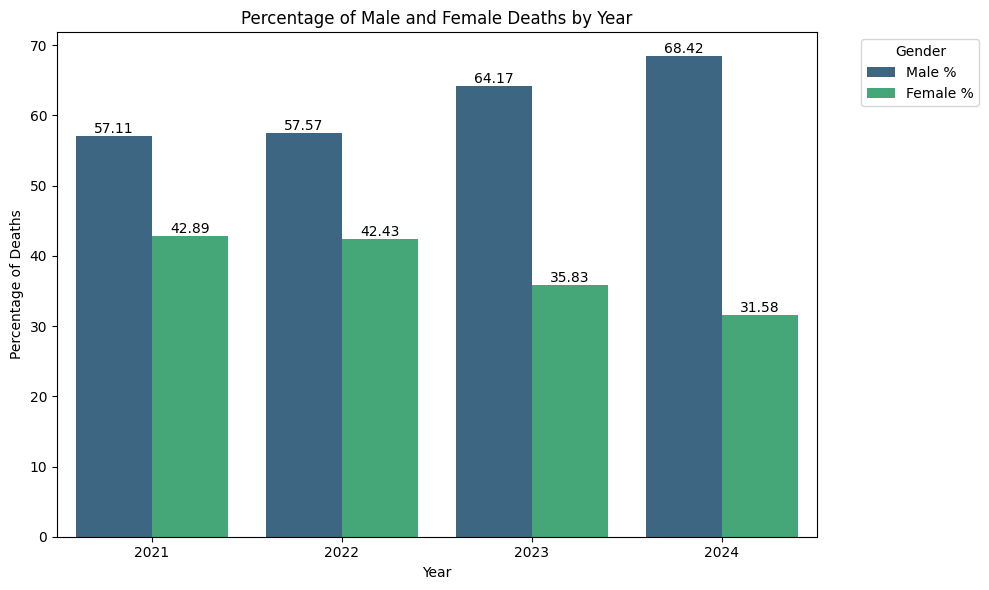

In [31]:
# Grouped bar chart: Percentage of Male and Female Deaths by Year
# Melt the DataFrame to long format for Seaborn
melted_data = pd.melt(merged_genderdata, id_vars=['year'],
                      value_vars=['Male %', 'Female %'],
                      var_name='Gender', value_name='Deaths %')

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_data, x='year', y='Deaths %', hue='Gender', palette='viridis')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Deaths')
plt.title('Percentage of Male and Female Deaths by Year')

# Reposition the legend to prevent overlap
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels on top of each bar
for p in ax.patches:
    # p.get_x() + p.get_width() / 2 places the label at the center of each bar
    if p.get_height() > 0:  # Skip zero-height bars
        ax.annotate(f'{p.get_height():.2f}', # Format height to 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),  # Offset to position the label above the bar
                textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


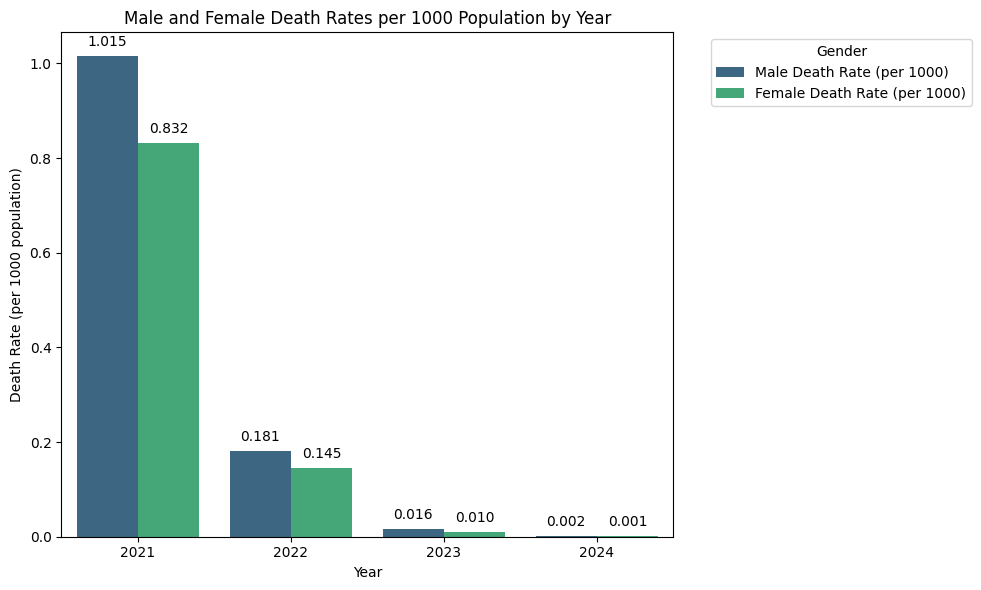

In [32]:
# Grouped bar chart: Male and Female Death Rates per 1000 Population by Year
# Melt the DataFrame to long format for Seaborn
melted_data2 = pd.melt(merged_genderdata,
                  id_vars='year',
                  value_vars=['Male Death Rate (per 1000)', 'Female Death Rate (per 1000)'],
                  var_name='Gender',
                  value_name='Death Rate (per 1000)')

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_data2, x='year', y='Death Rate (per 1000)', hue='Gender', palette='viridis')

# Add labels and title
plt.title('Male and Female Death Rates per 1000 Population by Year')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 1000 population)')

# Add and reposition the legend to prevent overlap
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels above each bar
for p in ax.patches:
    if p.get_height() > 0:  # Skip zero-height bars
        ax.annotate(f'{p.get_height():.3f}',  # Format height to 3 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position above bar
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

**Research Question: Is the proportion of death cases with comorbidities higher than the proportion of death cases without comorbidities?**

In [33]:
# Calculate the number of deaths with and without comorbidities
deaths_with_comorb = death_demographic[death_demographic['comorb'] == 1].shape[0]
deaths_without_comorb = death_demographic[death_demographic['comorb'] == 0].shape[0]

# Display the results
print(f"Number of deaths with comorbidities: {deaths_with_comorb}")
print(f"Number of deaths without comorbidities: {deaths_without_comorb}")

Number of deaths with comorbidities: 28286
Number of deaths without comorbidities: 7793


In [34]:
# Group by year and calculate deaths with comorbidities, deaths without comorbidities and total deaths for each year
grouped = death_demographic.groupby('year')
comorb_summary = grouped[['comorb']].apply(lambda x: pd.Series({
    'Deaths with comorbdities': x[x['comorb'] == 1].shape[0],
    'Deaths without comorbdities': x[x['comorb'] == 0].shape[0],
    'Total Deaths': x.shape[0]
}))

# Calculate the percentage of deaths with comorbidities and deaths without comorbidities within each year
comorb_summary['% Deaths with Comorbdities'] = (comorb_summary['Deaths with comorbdities'] / comorb_summary['Total Deaths']) * 100
comorb_summary['% Deaths without Comorbdities'] = (comorb_summary['Deaths without comorbdities'] / comorb_summary['Total Deaths']) * 100

# Format the percentage to 2 decimal places
comorb_summary['% Deaths with Comorbdities'] = comorb_summary['% Deaths with Comorbdities'].round(2)
comorb_summary['% Deaths without Comorbdities'] = comorb_summary['% Deaths without Comorbdities'].round(2)

# Reset the index to bring 'year' back as a column
comorb_summary = comorb_summary.reset_index()

# Display the results, including total deaths per year
print(comorb_summary)

# Save 'comorb_summary' as a CSV file for data storage
comorb_summary.to_csv('comorb_summary.csv', index=False)

   year  Deaths with comorbdities  Deaths without comorbdities  Total Deaths  \
0  2021                     23258                         6957         30215   
1  2022                      4608                          758          5366   
2  2023                       375                           66           441   
3  2024                        45                           12            57   

   % Deaths with Comorbdities  % Deaths without Comorbdities  
0                       76.98                          23.02  
1                       85.87                          14.13  
2                       85.03                          14.97  
3                       78.95                          21.05  


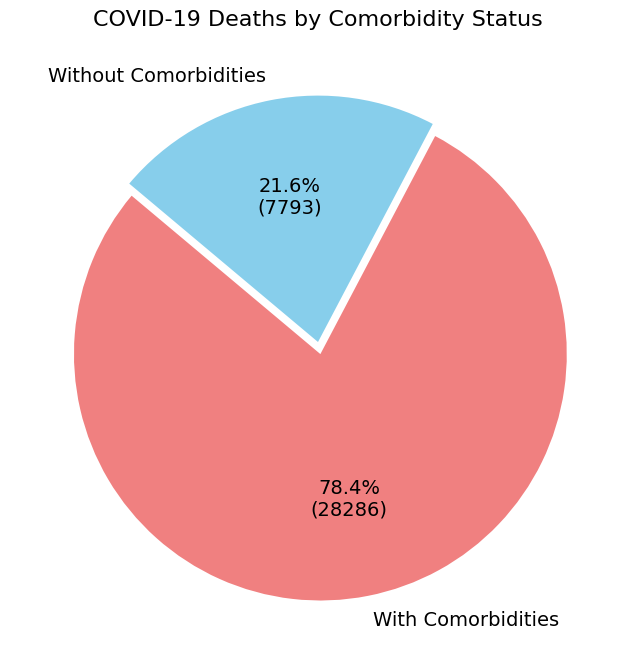

In [35]:
# Pie Chart: COVID-19 Deaths by Comorbdity Status
sizes = [deaths_with_comorb, deaths_without_comorb]
labels = ['With Comorbidities', 'Without Comorbidities']
colors = ['lightcoral', 'skyblue']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=140,
    autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, (p/100)*sum(sizes)),  # Display percentage and number
    explode=(0.05, 0),  # Slightly "explode" the first slice for emphasis
    textprops={'fontsize': 14}  # Adjust text size
)

# Add title
plt.title('COVID-19 Deaths by Comorbidity Status', fontsize=16)

# Display the plot
plt.show()


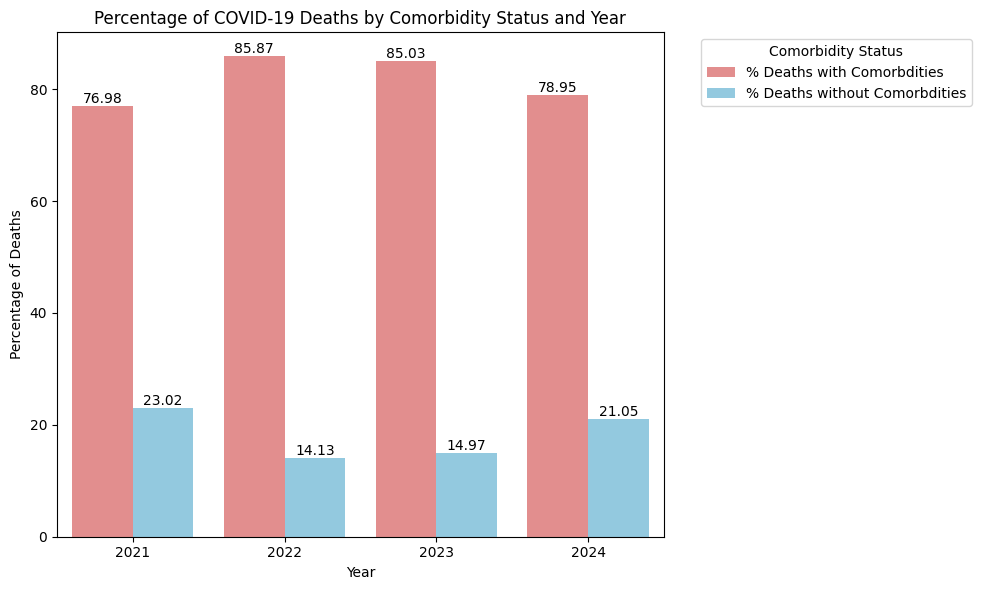

In [37]:
# Grouped bar chart: Percentage of COVID-19 Deaths by Comorbidity Status and Year

# Melt the DataFrame to long format for Seaborn
melted_comorb = pd.melt(comorb_summary, id_vars=['year'],
                      value_vars=['% Deaths with Comorbdities', '% Deaths without Comorbdities'],
                      var_name='Comorbidity Status', value_name='Deaths %')

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_comorb, x='year', y='Deaths %', hue='Comorbidity Status', palette=('lightcoral', 'skyblue'))

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Percentage of Deaths')
plt.title('Percentage of COVID-19 Deaths by Comorbidity Status and Year')

# Reposition the legend to prevent overlap
plt.legend(title='Comorbidity Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add labels on top of each bar
for p in ax.patches:
    # p.get_x() + p.get_width() / 2 places the label at the center of each bar
    if p.get_height() > 0:  # Skip zero-height bars
        ax.annotate(f'{p.get_height():.2f}', # Format height to 2 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),  # Offset to position the label above the bar
                textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

**Research Question: Which age group experienced the highest death rate?**

In [38]:
# Define age bins and labels
bins = [0, 9, 19, 59, float('inf')]  # Bin edges for 0-9, 10-19, 20-59, 60+
labels = ['0-9', '10-19', '20-59', '60+']  # Corresponding labels for each bin

# Add a new column 'age_group' to categorize deaths into age groups
death_demographic['age_group'] = pd.cut(death_demographic['age'], bins=bins, labels=labels, right=True)

print(death_demographic.isnull().sum())

date_announced     0
age                0
male               0
comorb             0
year               0
age_group         47
dtype: int64


In [39]:
# Group by 'year' and 'age_group' and calculate the number of deaths
age_summary = death_demographic.groupby(['year', 'age_group']).size().reset_index(name='Deaths')

# Calculate total deaths for each year to compute percentages
total_deaths_per_year = death_demographic.groupby('year').size().reset_index(name='Total Deaths')

# Merge the total deaths per year with the age_summary DataFrame
age_summary = age_summary.merge(total_deaths_per_year, on='year')

# Calculate the percentage of deaths for each age group
age_summary['Percentage'] = (age_summary['Deaths'] / age_summary['Total Deaths']) * 100

# Format the percentage to 2 decimal places
age_summary['Percentage'] = age_summary['Percentage'].round(2)

# Display the resulting summary table
print(age_summary)


    year age_group  Deaths  Total Deaths  Percentage
0   2021       0-9      41         30215        0.14
1   2021     10-19      73         30215        0.24
2   2021     20-59   12979         30215       42.96
3   2021       60+   17101         30215       56.60
4   2022       0-9      31          5366        0.58
5   2022     10-19      38          5366        0.71
6   2022     20-59    1226          5366       22.85
7   2022       60+    4047          5366       75.42
8   2023       0-9       1           441        0.23
9   2023     10-19       3           441        0.68
10  2023     20-59      70           441       15.87
11  2023       60+     365           441       82.77
12  2024       0-9       1            57        1.75
13  2024     10-19       1            57        1.75
14  2024     20-59       9            57       15.79
15  2024       60+      46            57       80.70


<ipython-input-39-91962cad74ac>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_summary = death_demographic.groupby(['year', 'age_group']).size().reset_index(name='Deaths')


In [40]:
# GitHub raw CSV URL for age population by year csv file (sourced from Department of Statistics, Malaysia website)
url3 = 'https://raw.githubusercontent.com/khoocheeshin/HIAGroupProject/refs/heads/main/AgePopulationByYear.csv'

# Load the CSV file into a DataFrame
age_population = pd.read_csv(url3)

# Display the content to confirm it's loaded correctly
age_population.head()

,year,total_pop,pop_4,pop_9,pop_14,pop_19,pop_24,pop_29,pop_34,pop_39,pop_44,pop_49,pop_54,pop_59,pop_64,pop_69,pop_74,pop_79,pop_84,pop_85+
0,2021,32576300,2445500,2639500,2600100,2800700,2893000,2851700,2865500,2777900,2267200,1870200,1605500,1460800,1208700,951300,645000,353600,201100,139000
1,2022,32698100,2374200,2592800,2613000,2781900,2912800,2835000,2850100,2777000,2359100,1893900,1638300,1452000,1254300,974500,674500,377100,203100,134500
2,2023,33401800,2366500,2584300,2618400,2774300,3041800,2925200,2889400,2844600,2477800,1955500,1675900,1472000,1290900,1014800,712800,413100,204900,139600
3,2024,34058800,2360200,2573900,2620100,2724900,3157100,3036700,2955900,2856700,2608200,2018900,1723500,1473100,1339600,1051300,750400,446700,215000,146600


In [41]:
# Create aggregated age groups in age_population
age_population['0-9'] = age_population['pop_4'] + age_population['pop_9']
age_population['10-19'] = age_population['pop_14'] + age_population['pop_19']
age_population['20-59'] = (age_population['pop_24'] + age_population['pop_29'] +
                           age_population['pop_34'] + age_population['pop_39'] +
                           age_population['pop_44'] + age_population['pop_49'] +
                           age_population['pop_54'] + age_population['pop_59'])
age_population['60+'] = (age_population['pop_64'] + age_population['pop_69'] +
                         age_population['pop_74'] + age_population['pop_79'] +
                         age_population['pop_84'] + age_population['pop_85+'])

# Keep only the relevant columns for merging
aggregated_population = age_population[['year', '0-9', '10-19', '20-59', '60+']]

# Melt the DataFrame to match the format of age_summary (long format)
aggregated_population = aggregated_population.melt(id_vars=['year'],
                                                   var_name='age_group',
                                                   value_name='population')

# Merge the aggregated population data with age_summary
merged_age_data = age_summary.merge(aggregated_population, on=['year', 'age_group'], how='left')

# Calculate death rates per 1,000 population for each age group
merged_age_data['Death Rate (per 1000)'] = (merged_age_data['Deaths'] / merged_age_data['population']) * 1000

# Format death rate to 3 decimal places
merged_age_data['Death Rate (per 1000)'] = merged_age_data['Death Rate (per 1000)'].round(3)

# Check the data of merged_age_data
print(merged_age_data)

# Save 'merged_age_data' as a CSV file for data storage
merged_age_data.to_csv('merged_age_data.csv', index=False)


    year age_group  Deaths  Total Deaths  Percentage  population  \
0   2021       0-9      41         30215        0.14     5085000   
1   2021     10-19      73         30215        0.24     5400800   
2   2021     20-59   12979         30215       42.96    18591800   
3   2021       60+   17101         30215       56.60     3498700   
4   2022       0-9      31          5366        0.58     4967000   
5   2022     10-19      38          5366        0.71     5394900   
6   2022     20-59    1226          5366       22.85    18718200   
7   2022       60+    4047          5366       75.42     3618000   
8   2023       0-9       1           441        0.23     4950800   
9   2023     10-19       3           441        0.68     5392700   
10  2023     20-59      70           441       15.87    19282200   
11  2023       60+     365           441       82.77     3776100   
12  2024       0-9       1            57        1.75     4934100   
13  2024     10-19       1            57        

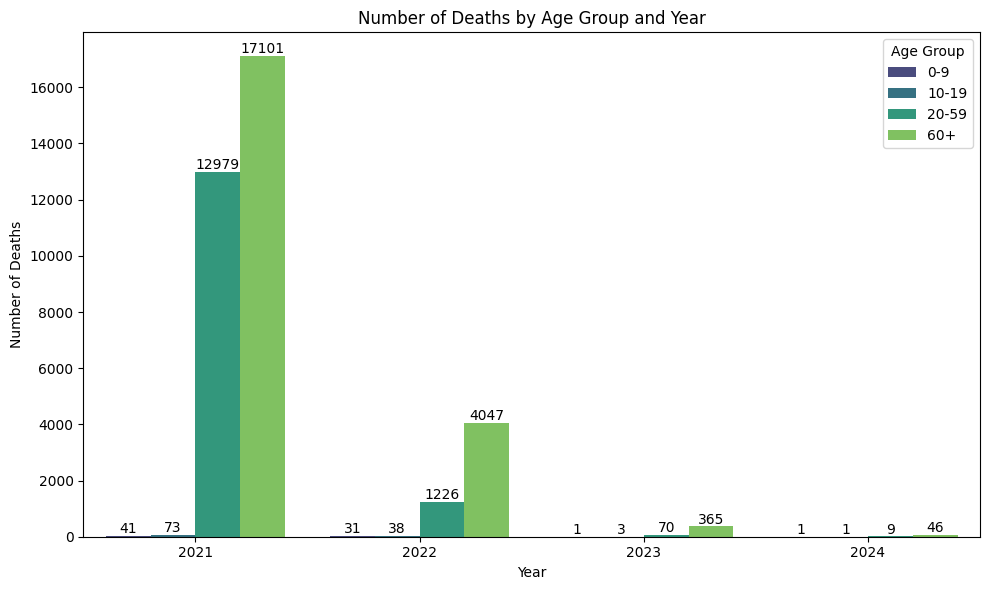

In [42]:
# Grouped bar chart: Number of Deaths by Age Group and Year
# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=merged_age_data, x='year', y='Deaths', hue='age_group', palette='viridis')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Age Group and Year')
plt.legend(title='Age Group')

# Add labels on top of each bar
for p in ax.patches:
    # p.get_x() + p.get_width() / 2 places the label at the center of each bar
    if p.get_height() > 0:  # Skip zero-height bars
        ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),  # Offset to position the label above the bar
                textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

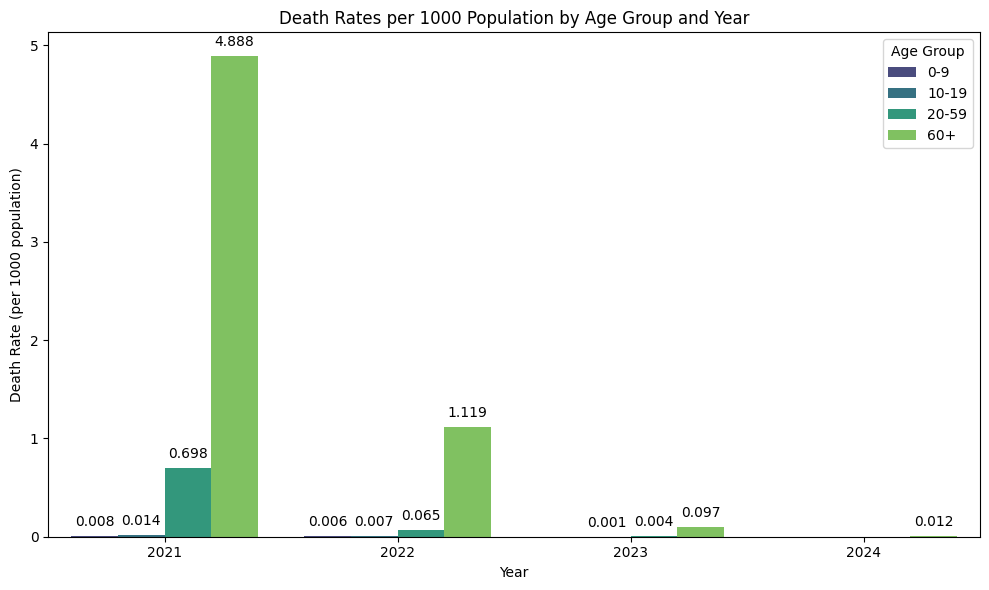

In [43]:
# Grouped bar chart: Death Rates per 1000 Population by Age Group and Year
# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=merged_age_data, x='year', y='Death Rate (per 1000)', hue='age_group', palette='viridis')

# Add labels, title and legend
plt.title('Death Rates per 1000 Population by Age Group and Year')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 1000 population)')
plt.legend(title='Age Group')

# Add labels above each bar
for p in ax.patches:
    if p.get_height() > 0:  # Skip zero-height bars
        ax.annotate(f'{p.get_height():.3f}',  # Format height to 3 decimal places
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position above bar
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()